# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
creditcard = pd.read_csv('creditcard.csv')

In [4]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA

In [6]:
creditcard['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

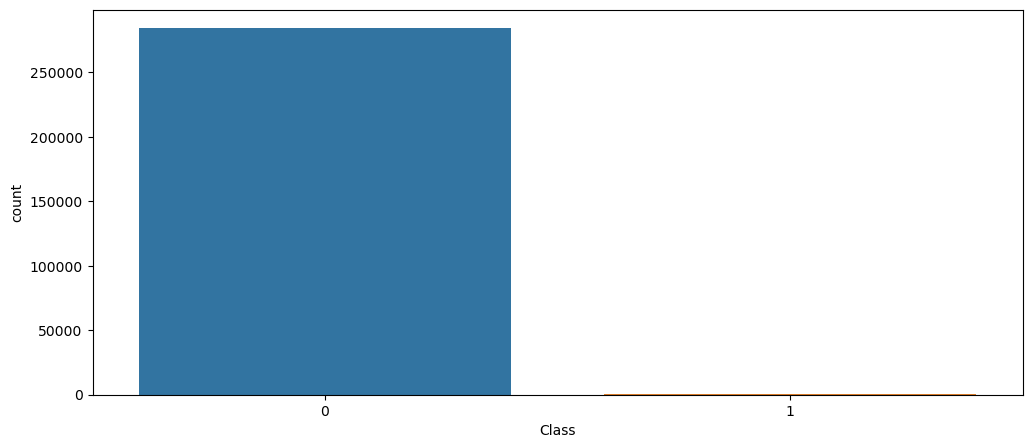

In [13]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Class', data=creditcard)

**Data balancing becomes a crucial part in building a robust model.**

/var/folders/ls/vcn1c9154dz3ps27jhzrm_s40000gn/T/ipykernel_6400/1394039120.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard[creditcard['Class']==1]['Time'], color='blue', bins=30)
/var/folders/ls/vcn1c9154dz3ps27jhzrm_s40000gn/T/ipykernel_6400/1394039120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

<Axes: xlabel='Time', ylabel='Density'>

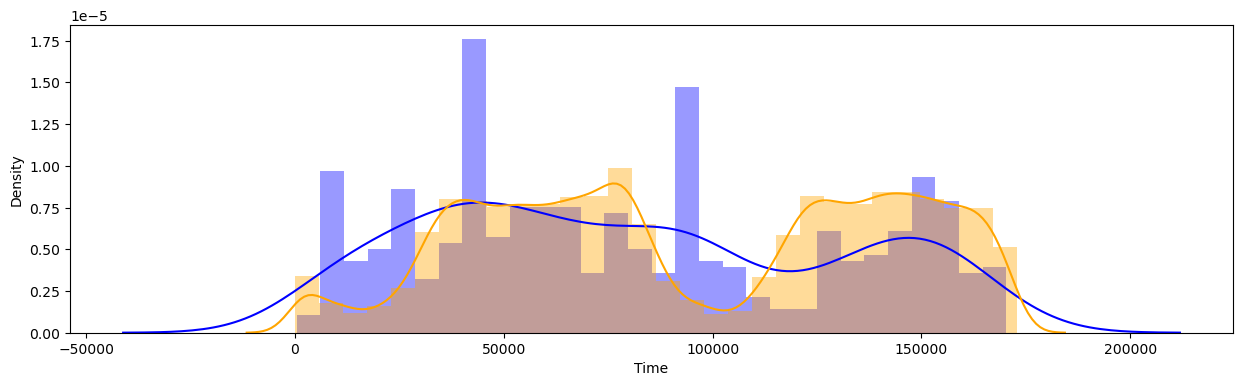

In [57]:
plt.figure(figsize=(15,4))
sns.distplot(creditcard[creditcard['Class']==1]['Time'], color='blue', bins=30)
sns.distplot(creditcard[creditcard['Class']==0]['Time'], color='orange', bins=30)

/var/folders/ls/vcn1c9154dz3ps27jhzrm_s40000gn/T/ipykernel_6400/827294866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard[creditcard['Class']==1]['Amount'], color='brown')


<Axes: xlabel='Amount', ylabel='Density'>

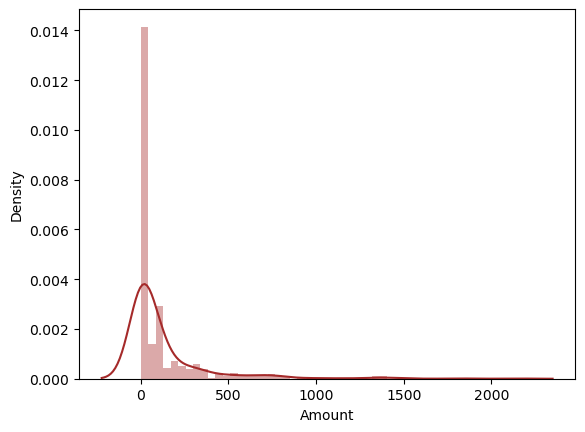

In [34]:
sns.distplot(creditcard[creditcard['Class']==1]['Amount'], color='brown')

<Axes: xlabel='Class', ylabel='Time'>

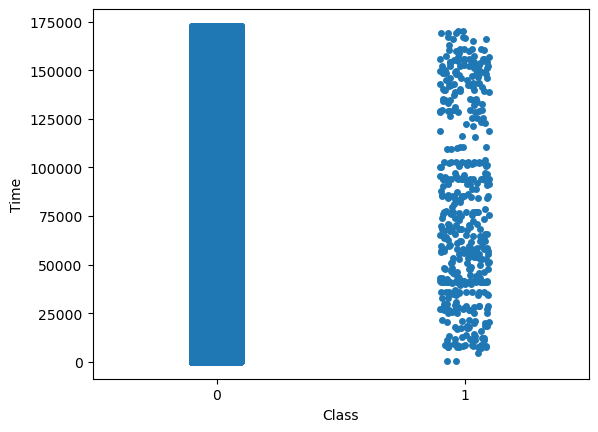

In [31]:
sns.stripplot(x='Class', y='Time', data=creditcard, jitter=True)

<Axes: xlabel='Class', ylabel='Time'>

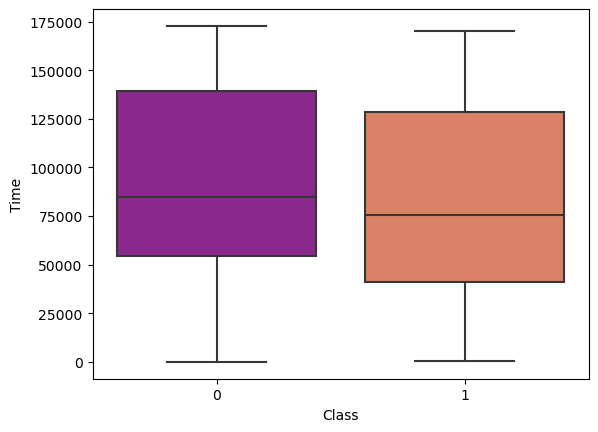

In [32]:
sns.boxplot(x='Class', y='Time', data=creditcard, palette='plasma')

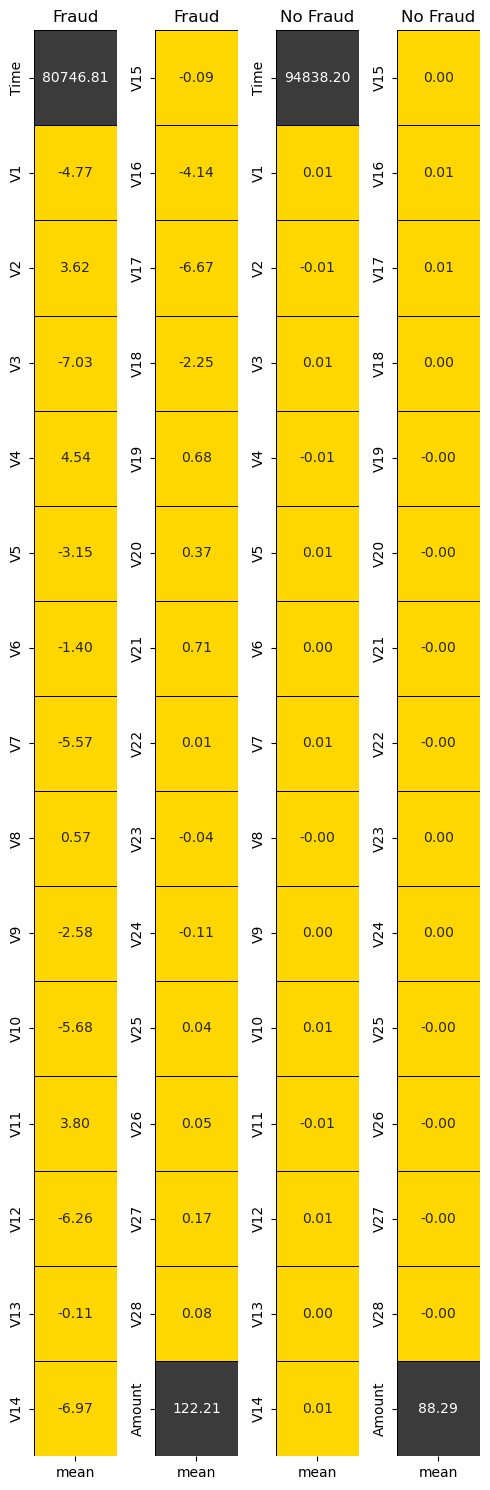

In [80]:
fraud = creditcard[creditcard['Class'] == 1].describe().T # .T为转置
nofraud = creditcard[creditcard['Class'] == 0].describe().T

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 1, ncols = 4, figsize=(5,15))
plt.subplot(1,4,1)
sns.heatmap(fraud[['mean']][:15], annot = True, cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud');

plt.subplot(1,4,2)
sns.heatmap(fraud[['mean']][15:30], annot = True, cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud');
# 29正好到Amount

plt.subplot(1,4,3)
sns.heatmap(nofraud[['mean']][:15], annot = True, cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud');

plt.subplot(1,4,4)
sns.heatmap(nofraud[['mean']][15:30], annot = True, cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud');

fig.tight_layout(w_pad = 1)

For No Fraud cases, V1 - V28 mean values are almost 0 for all the cases. Mean Amount, 88.29, is less than the mean transaction amount, 122.21, of the Fraud cases.
Time taken for No Fraud transactions is more than those for Fraud transactions.

**These could be some of the indicators for detecting fraud transactions.**

## Data Preprocessing
### Data Cleaning
- Removing duplicates 
- Removing dependent (highly correlated) variables 
- Removing unnecessary columns 
- Handling missing data 
- Handling outliers and noise 

In [81]:
creditcard.drop_duplicates(inplace=True)

<Axes: >

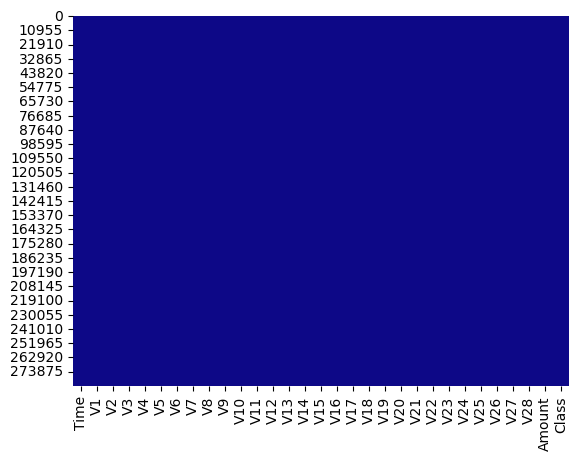

In [59]:
sns.heatmap(creditcard.isnull(), cmap='plasma', cbar=False)

no missing value!

### Data Transformation
- Feature Selection
- Data Scaling
- PCA

<Axes: >

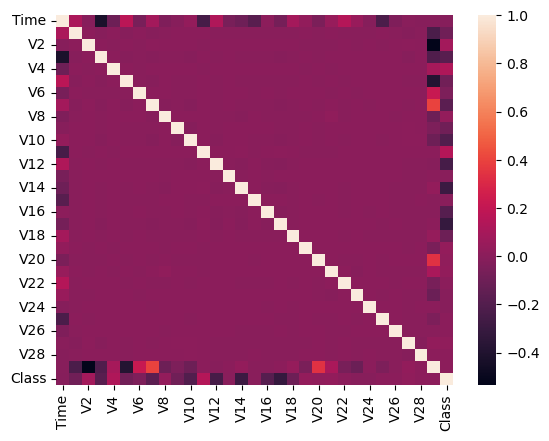

In [82]:
sns.heatmap(creditcard.corr())

From the heatmap, it can be observed that there are no strong positive or negative correlations (> 0.8) between any pairs of variables in the dataset. 

input: numerical output: categorical -> **ANOVA**

In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

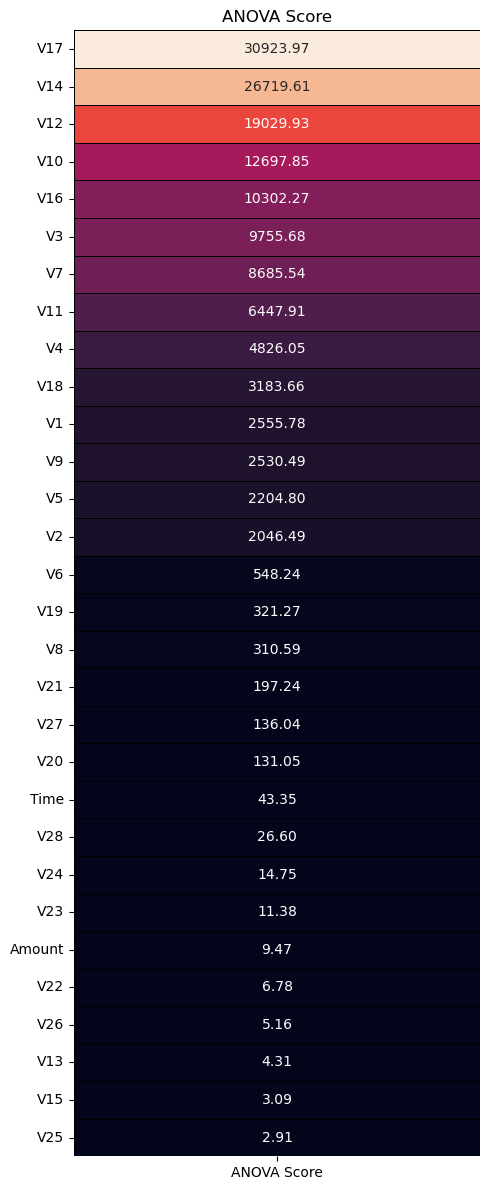

In [98]:
features = creditcard.loc[:,:'Amount']
target = creditcard.loc[:,'Class']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_, index = list(features.columns), columns = ['ANOVA Score']) 
featureScores = featureScores.sort_values(ascending = False, by = 'ANOVA Score')

fig,ax = plt.subplots(figsize=(5,12))
sns.heatmap(featureScores.iloc[:,:],annot = True, linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score')
fig.tight_layout()

Higher the value of the ANOVA score, higher the importance of that feature with the target variable.

From the above plot, we will reject features with values less than 20.

In [102]:
featureScores.index

Index(['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18', 'V1',
       'V9', 'V5', 'V2', 'V6', 'V19', 'V8', 'V21', 'V27', 'V20', 'Time', 'V28',
       'V24', 'V23', 'Amount', 'V22', 'V26', 'V13', 'V15', 'V25'],
      dtype='object')

In [113]:
df = creditcard.drop(['V24', 'V23', 'Amount', 'V22', 'V26', 'V13', 'V15', 'V25'], inplace=False, axis=1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V14,V16,V17,V18,V19,V20,V21,V27,V28,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558,-0.021053,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983,0.014724,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353,-0.059752,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723,0.061458,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422,0.215153,0


### Data Balancing

In order to cope with unbalanced data, there are 2 options :
- Undersampling : Trim down the majority samples of the target variable.
- Oversampling : Increase the minority samples of the target variable to the majority samples.

For best performances, we will use the **combination of undersampling and oversampling**.
First, we will undersample the majority samples and it is followed by oversampling minority samples.
For data balancing, we will use **imblearn**.

In [114]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

Data Balancing for Model based on ANOVA Score :

Sampling Strategy : expected ( Samples of Minority Class ) / ( Samples of Majority Class )

In [119]:
over = SMOTE(sampling_strategy = 0.5) 
# 对少数类样本进行分析并根据少数类样本人工合成新样本添加到数据集中，
# 比RandomOverSample简单复制不容易产生模型过拟合的问题
under = RandomUnderSampler(sampling_strategy = 0.1)
f = df.iloc[:,:22].values
t = df.iloc[:,22].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f, t = pipeline.fit_resample(f, t)
Counter(t) # Counter()方法的作用是计算出字符串中每个字符出现的次数

Counter({0: 4730, 1: 2365})

Final Class Samples :
- Majority Class : No Fraud Cases : 4730 samples
- Minority Class : Fraud Cases : 2365 samples

Due to this duplication process, we are using synthetic data for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.

Thus, evaluating models using accuracy will be misleading. Instead, we will go for confusion matrix, ROC-AUC graph and ROC-AUC score for model evaluation.

## Modeling

supervised, classification: Logistics Regression, SVM, KNN, Random Forest, XGBoost

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(f, t, test_size=0.33, random_state=42)

In [136]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [137]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### logistics regression

/Users/lexie_chen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lexie_chen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Cross Validation Score :  98.79%
ROC_AUC Score :  94.13%


/Users/lexie_chen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lexie_chen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

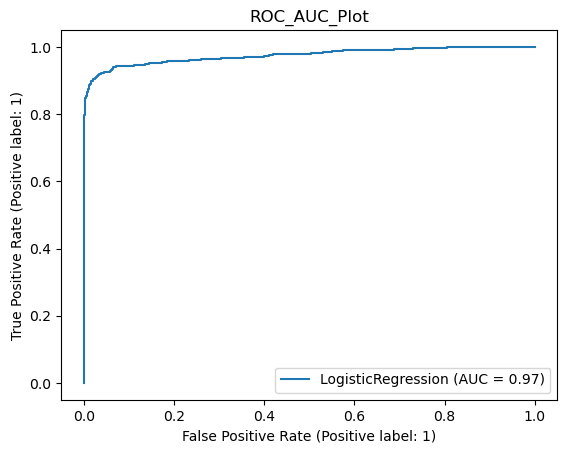

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1585
           1       0.93      0.92      0.92       757

    accuracy                           0.95      2342
   macro avg       0.95      0.94      0.94      2342
weighted avg       0.95      0.95      0.95      2342



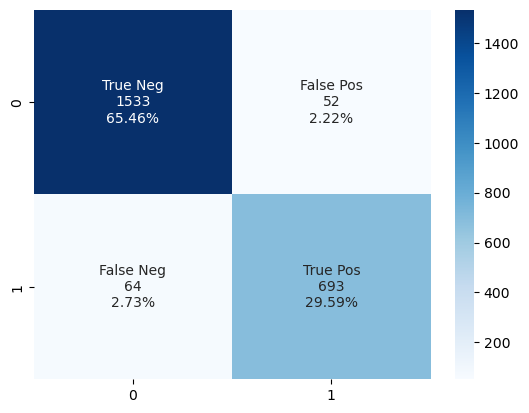

In [138]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression() 
model(classifier_lr,X_train, y_train, X_test, y_test)
model_evaluation(classifier_lr, X_test, y_test)

Cross Validation Score :  65.32%
ROC_AUC Score :  50.00%


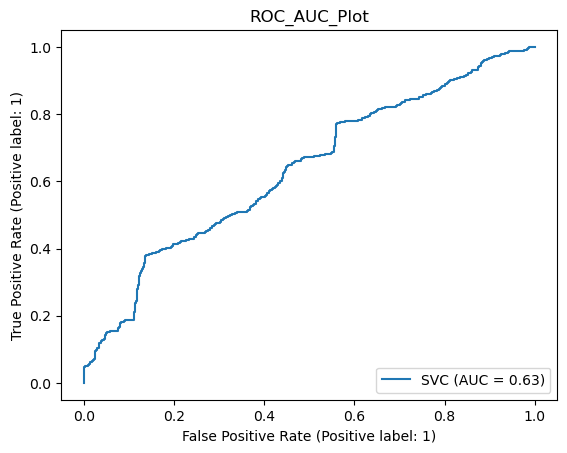

              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1585
           1       0.00      0.00      0.00       757

    accuracy                           0.68      2342
   macro avg       0.34      0.50      0.40      2342
weighted avg       0.46      0.68      0.55      2342



/Users/lexie_chen/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lexie_chen/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lexie_chen/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


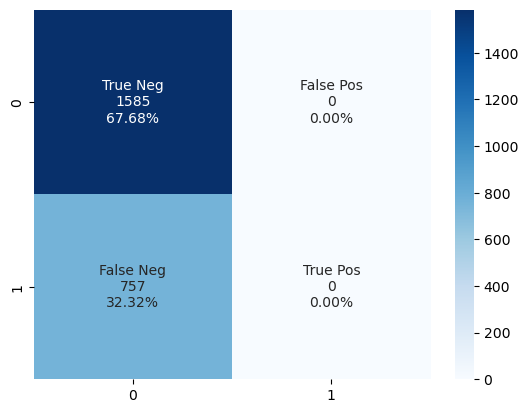

In [139]:
from sklearn.svm import SVC
classifier_lr2 = SVC()
model(classifier_lr2,X_train, y_train, X_test, y_test)
model_evaluation(classifier_lr2, X_test, y_test)

really terrible

Cross Validation Score :  82.58%
ROC_AUC Score :  71.82%


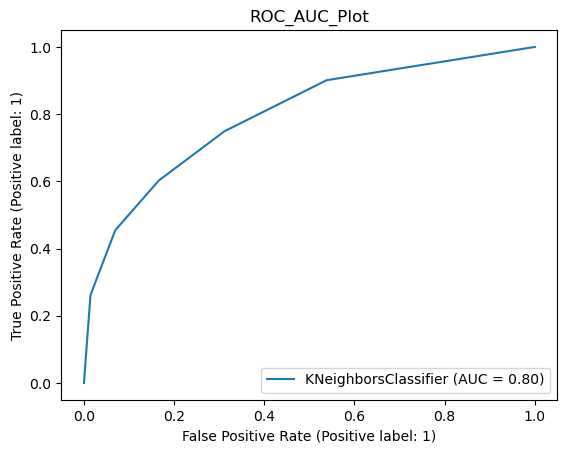

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1585
           1       0.63      0.60      0.62       757

    accuracy                           0.76      2342
   macro avg       0.72      0.72      0.72      2342
weighted avg       0.76      0.76      0.76      2342



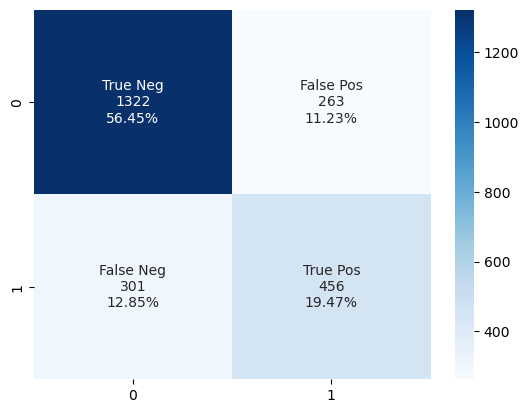

In [140]:
from sklearn.neighbors import KNeighborsClassifier
classifier_lr3 = KNeighborsClassifier()
model(classifier_lr3,X_train, y_train, X_test, y_test)
model_evaluation(classifier_lr3, X_test, y_test)

Cross Validation Score :  99.04%
ROC_AUC Score :  94.69%


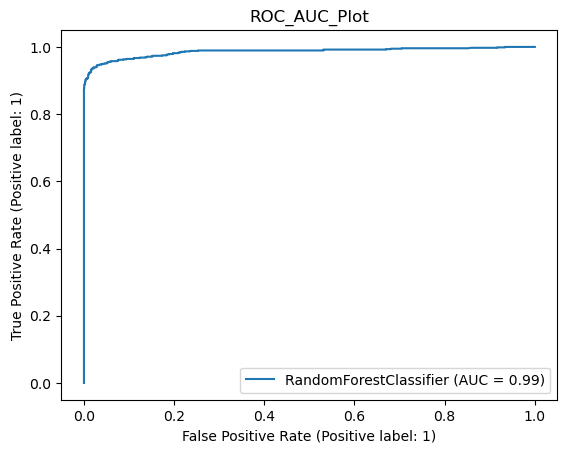

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1585
           1       0.99      0.90      0.94       757

    accuracy                           0.96      2342
   macro avg       0.97      0.95      0.96      2342
weighted avg       0.97      0.96      0.96      2342



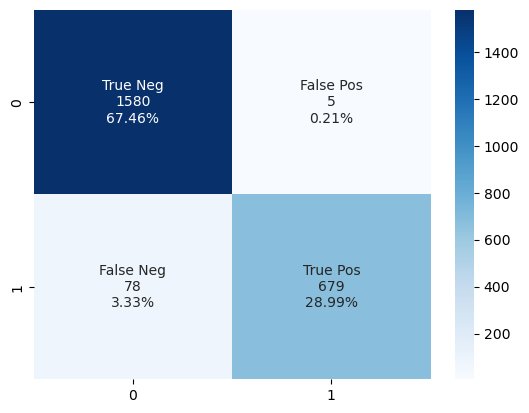

In [142]:
from sklearn.ensemble import RandomForestClassifier
classifier_lr4 = RandomForestClassifier(max_depth = 4,random_state = 101)
model(classifier_lr4,X_train, y_train, X_test, y_test)
model_evaluation(classifier_lr4, X_test, y_test)

pretty good!

Cross Validation Score :  99.76%
ROC_AUC Score :  97.61%


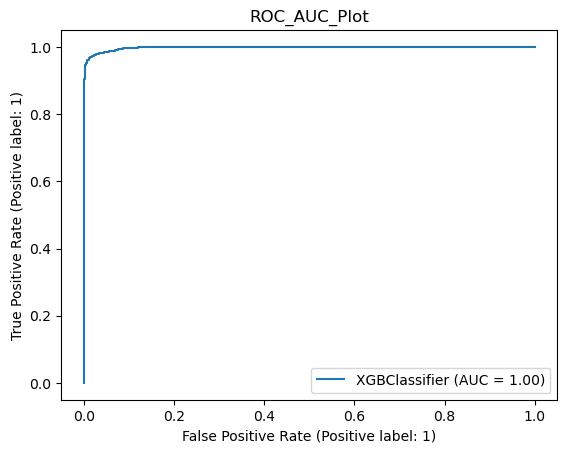

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1585
           1       0.98      0.96      0.97       757

    accuracy                           0.98      2342
   macro avg       0.98      0.98      0.98      2342
weighted avg       0.98      0.98      0.98      2342



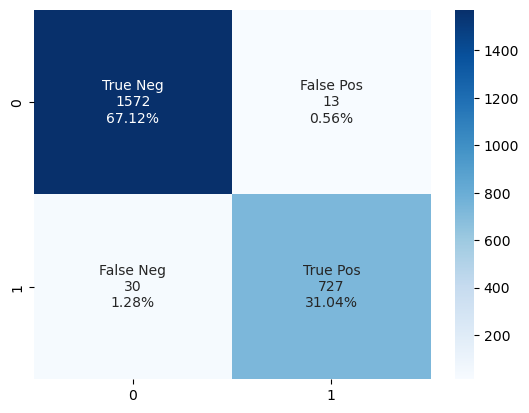

In [145]:
from xgboost import XGBClassifier
classifier_lr4 = XGBClassifier(max_depth = 4,random_state = 101)
model(classifier_lr4,X_train, y_train, X_test, y_test)
model_evaluation(classifier_lr4, X_test, y_test)

awesome!

## Conclusion

This is a great dataset to learn about binary classification problem with unbalanced data.

As the features are disguised, feature selection cannot be assisted based on the domain knowledge of the topic. Statistical tests hold the complete importance to select features for modeling.

Due to the use of SMOTE analysis for balancing the data, the models trained on this synthetic data cannot be evaluated using accuracy. Hence, we resort to Cross Validation Score and ROC-AUC Score for model evaluation.